## Convolution

In this example, we want to explore convolution itself and the effect of different convolution kernel have on an image.

**0) Loading and Preparing Data**

Importing libraries:

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<br>

**1) Images in Python**

First, we want to explore images in Python:<br>
Images are N-dimensional matrices, i.e. numpy arrays in python. Depending on the color scaling and the "depth" of the colors, the values might range from zero to one (if normalized), could be logical (zero *or* one, i.e. a black/white image) or often the values are integers ranging from zero to, say 255, if 8bit encoded.<br>
Let us read an image and explore shape, values and type:<br>
<br>

In [25]:
I = plt.imread('2.jpg')
print(type(I))          #np.array
print(I.shape)          #RGB color image
print(np.max(I))        #8 bit 

<class 'numpy.ndarray'>
(199, 188, 3)
255


In [55]:
print(I[:10,:10,2])#192 161 129

[[129 130 138 157 140 166 167 176 184 188]
 [119 116 139 149 143 147 166 180 194 192]
 [114 121 146 128 134 133 174 185 193 195]
 [118 134 138 105 110 125 178 191 193 195]
 [120 125 110  97 105 118 170 198 203 198]
 [127 109  86 109 125 114 164 216 203 200]
 [130 110  89 103 141 116 177 224 199 199]
 [128 119 100  82 136 116 192 220 201 197]
 [119 115  83  93 108 122 175 212 186 194]
 [109  95  77 107 127 132 175 200 191 197]]


<br>

We can display the image using *imshow*:<br>
<br>

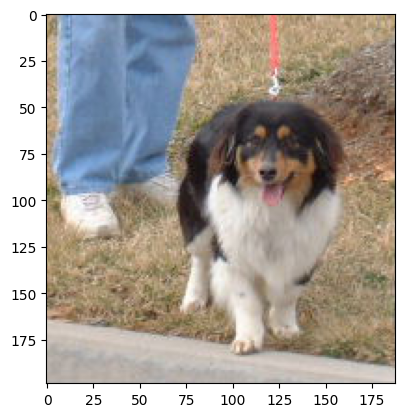

In [29]:
plt.imshow(I)

The different color channels contain different information:<br>
<br>

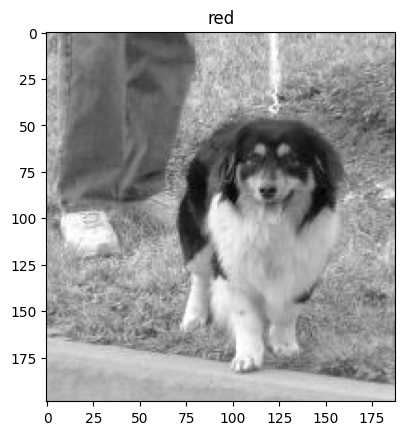

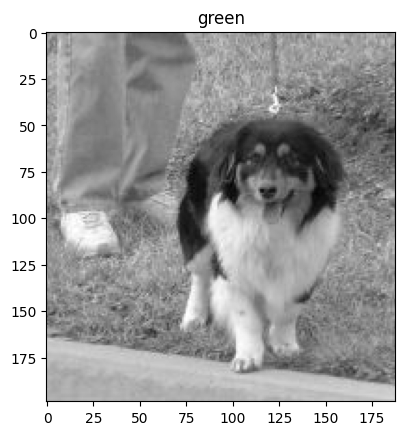

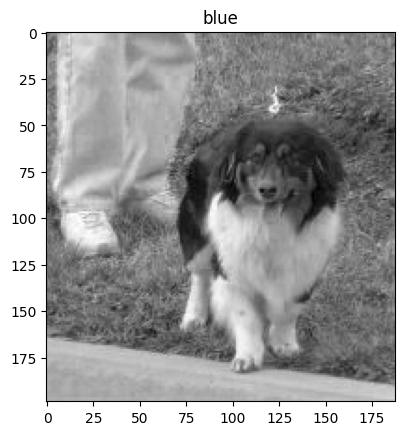

In [49]:
col = ['red', 'green', 'blue']

for i, c in zip(range(3), col):
    plt.imshow(I[:,:,i], cmap = 'gray')
    plt.title(c)
    plt.show()

We can see for example, that the leash is almost invisble in the blue color channel, but very bright in the red color channel.<br>
<br>

**2) Convolution**<br>
<br>
We first define a few common convolution filter/kernel and apply them to the image.<br>
The filters have different purpose: they can sharpen edges, blur the background or enhance the foreground.<br>
<br>

In [33]:
K1  = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
#edges
K2  = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
K3  = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
K4  = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
#sharpen
K5  = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
#blur
K6  = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
K6  = K6/9
K7  = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

K8  = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
#misc
K9  = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
K10 = np.array([[1, 1, 1], [0, 0, 0], [1, 1, 1]])
K11 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
K12 = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
K13 = np.array([[1, 0, 1], [1, 0, 1], [1, 0, 1]])

In [35]:
Kall = np.dstack((K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,K12,K13))

<br>

We like to visualize the filter first, before we are going to apply them to the image.<br>
<br>

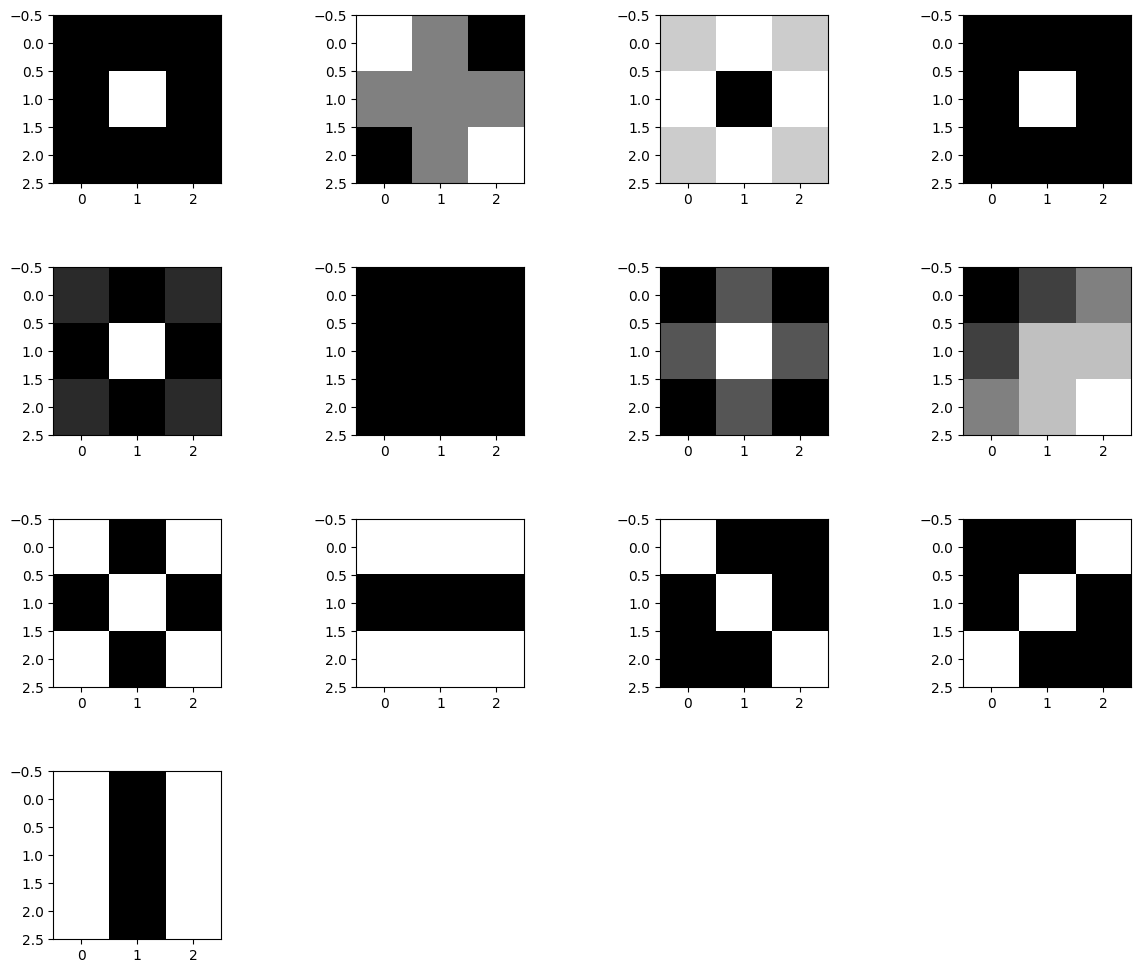

In [37]:
NK  = Kall.shape[2]
PS  = int(np.ceil(NK**0.5))
    
plt.figure(figsize = (15,12))
plt.subplots_adjust(hspace = 0.5)
        
for k in range(NK):
    plt.subplot(PS,PS,k+1)
    plt.imshow(Kall[:,:,k], cmap = 'gray')
        
plt.show()

Second, we define a simple convolution function. Note, that python has an internal convolution routine. The idea of the following function is to illustrate how convolution actually works:<br>
<br>

In [39]:
def MyConv(Image, K, padding = 0, stride = 1):
    
    #shape of input image
    [xImgShape , yImgShape, numChan] = Image.shape
    
    [xK, yK] = K.shape
    
    xOutput = int((xImgShape - xK + 2*padding)/stride + 1)
    yOutput = int((yImgShape - yK + 2*padding)/stride + 1)
    
    output  = np.zeros((xOutput, yOutput, numChan))
    
    imagePadded = np.zeros((xImgShape + 2*padding, yImgShape + 2*padding,\
                            numChan))
    imagePadded[int(padding):int(padding + xImgShape),\
                int(padding):int(padding + yImgShape),:] = Image
    
    
    for c in range(numChan):
        for y in range(yOutput):
            for x in range(xOutput):
                
                #finding corners of current slice
                y_start = y*stride
                y_end   = y_start + yK
                x_start = x*stride
                x_end   = x_start + xK
                
                current_slice = imagePadded[x_start:x_end, y_start:y_end, c]
                s             = np.multiply(current_slice, K)
                output[x,y,c] = np.sum(s)
        
    plt.imshow(output.sum(2), cmap = 'gray')
    plt.title('after convolution with padding'\
                 ' = ' + str(padding) + ' and stride = ' + str(stride))
    plt.show()
      
    return(output)

<br>

Let us experiment with different kernel, padding and stride length (see lecture).<br>
<br>

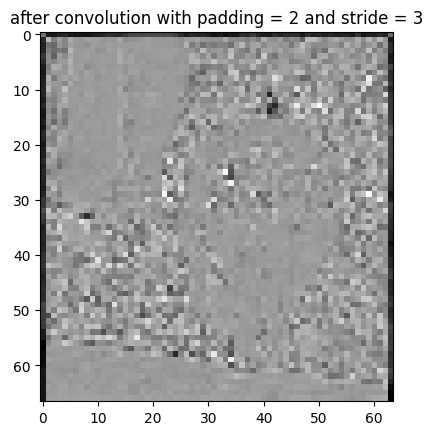

In [41]:
ImageConv = MyConv(I, Kall[:,:,3], padding = 2, stride = 3)

<br>

We note that for this particular filter, the background is enchanced, whereas the foreground is blurred. That might be helpful in order to separate the background from the foreground. <br>
<br>
Run *MyConv* for different padding and stride length and see how the equation<br>
<br>
$N_{out} = \frac{\left( N_{in}\,-\,N_{filt}\,+\,2\,P \right)}{S}$ + 1<br>
<br>
applies. Here, $N_{out}$ is the number of pixel of the output (convolved) image, $N_{in}$ the number of pixel of the input image, $N_{filt}$ the number of pixel of the convolution kernel and $P$ and $S$ refer to padding and stride length, respectively.<br>
Now let us run the different kernel on all color channels using the convolution method from scipy:<br>
<br>

In [43]:
from scipy.signal import convolve as Conv

def MyConvAll(Image, Kall):

    NK  = Kall.shape[2]
    NC  = Image.shape[2]
    
    PS  = int(np.ceil(NK**0.5))
    
    for i in range(NC):
        
        plt.figure(figsize = (15,12))
        plt.suptitle("after convolution of channel " + str(i+1),\
                     fontsize = 20, y = 0.95)
        plt.subplots_adjust(hspace = 0.5)
        
        for k in range(NK):
        
            plt.subplot(PS,PS,k+1)
            Out = Conv(Image[:,:,i],Kall[:,:,k])
            plt.imshow(Out, cmap = 'gray')
        
        plt.show()

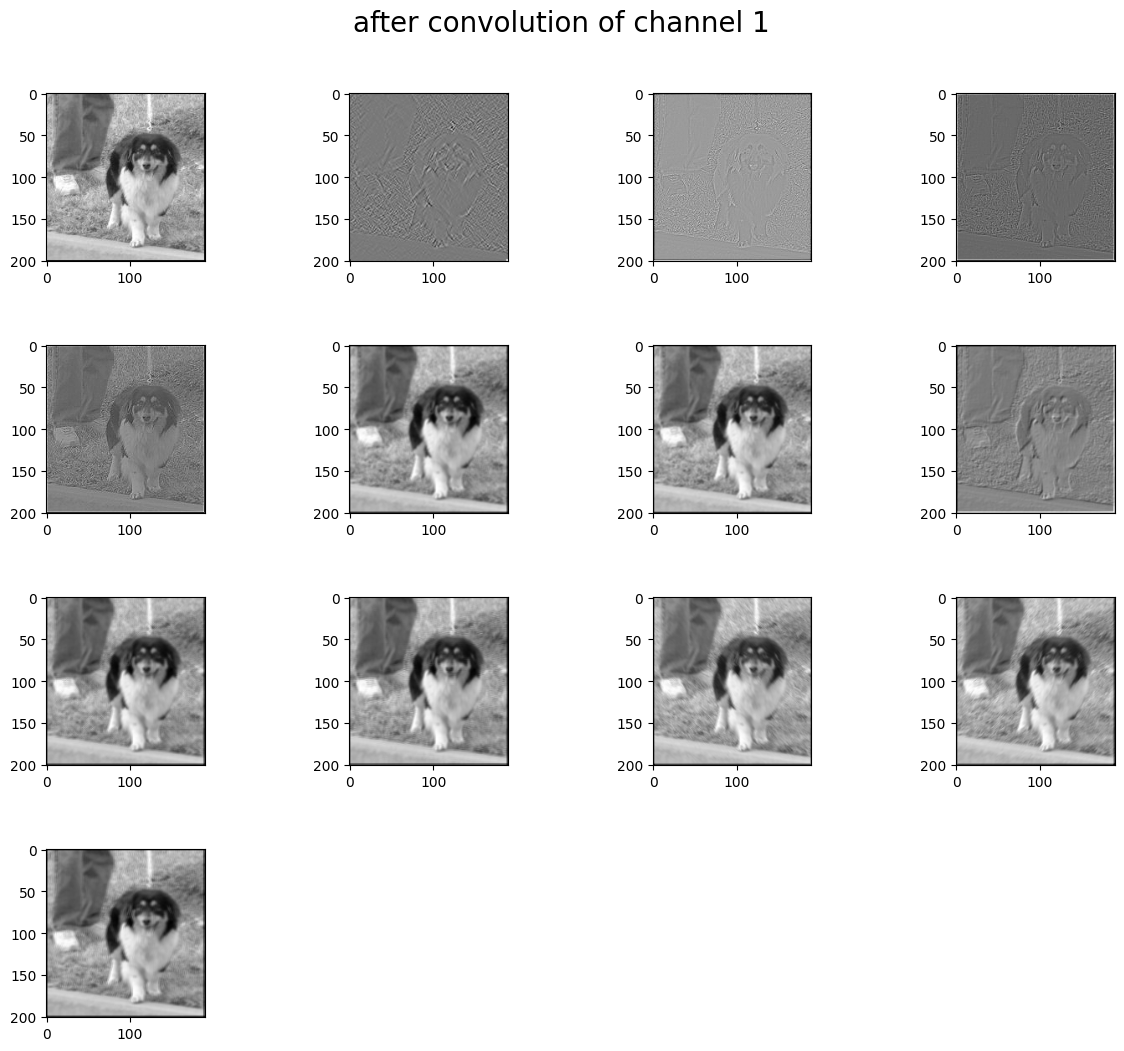

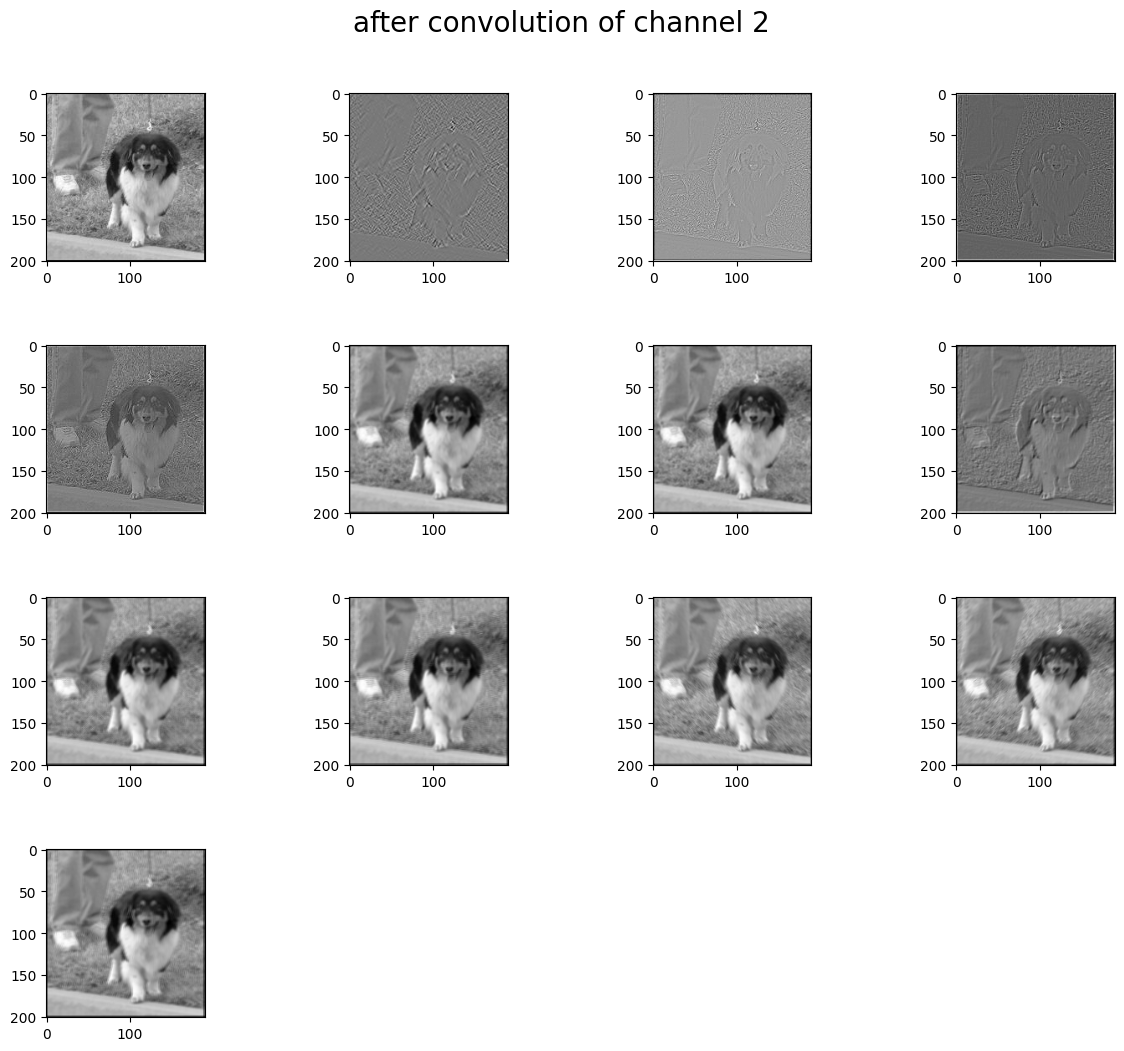

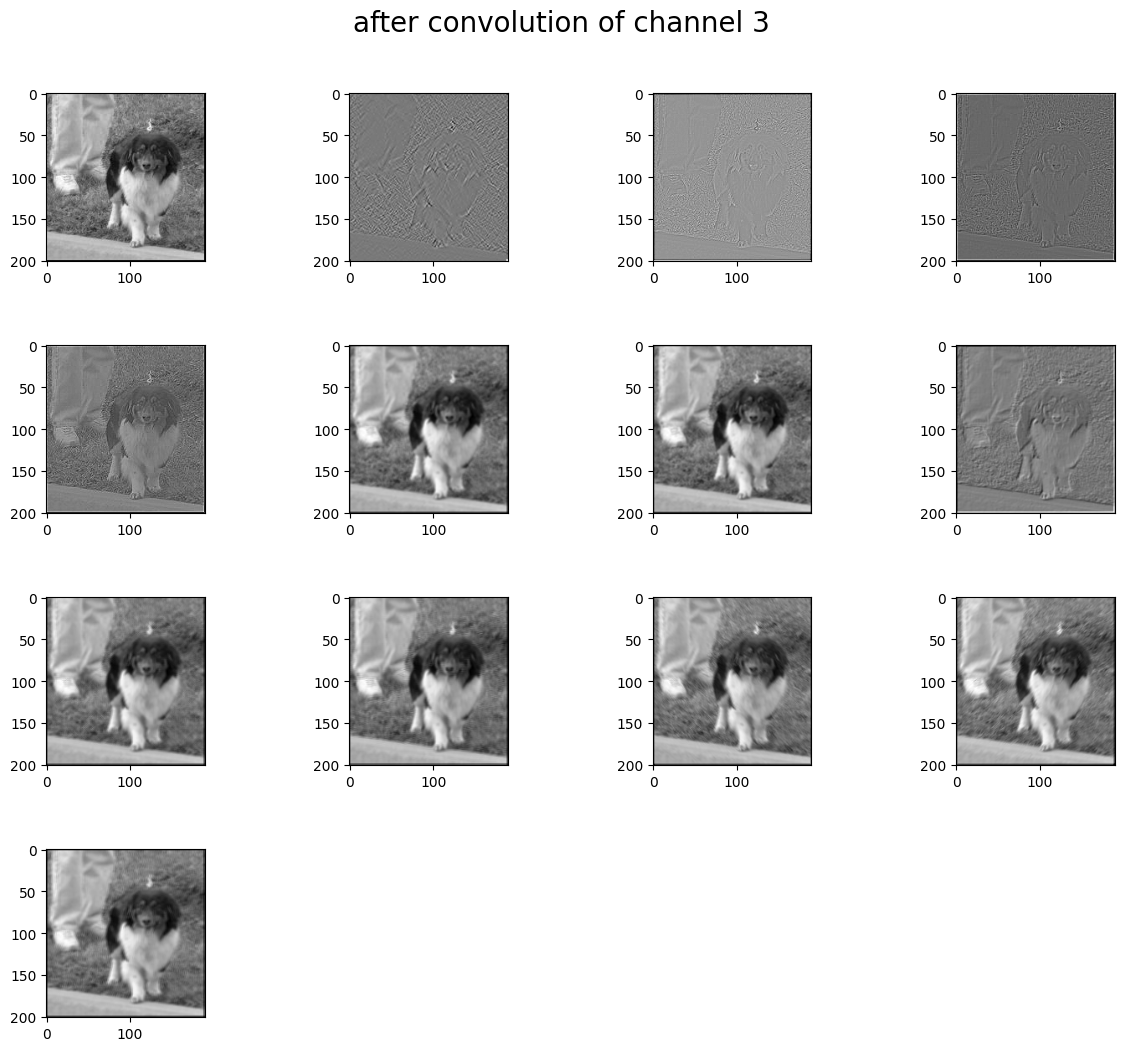

In [45]:
MyConvAll(I, Kall)